In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('cp_agg.csv')

In [14]:
cor_list =  ['dow',
 'year',
 'month',
 'day',
 'construction',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'Number of Accident']
df_cor = df[cor_list]

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df_cor)
trans = scaler.transform(df_cor)
trans_cor = pd.DataFrame(trans,index=df_cor.index,columns=df_cor.columns)

In [234]:
def cor_heatmap(df):
    plt.figure(figsize=(20,10))
    cor = df.corr() #Calculate the correlation of the above variables
    sns.heatmap(cor, annot = True) #Plot the correlation as heat map
    plt.show()

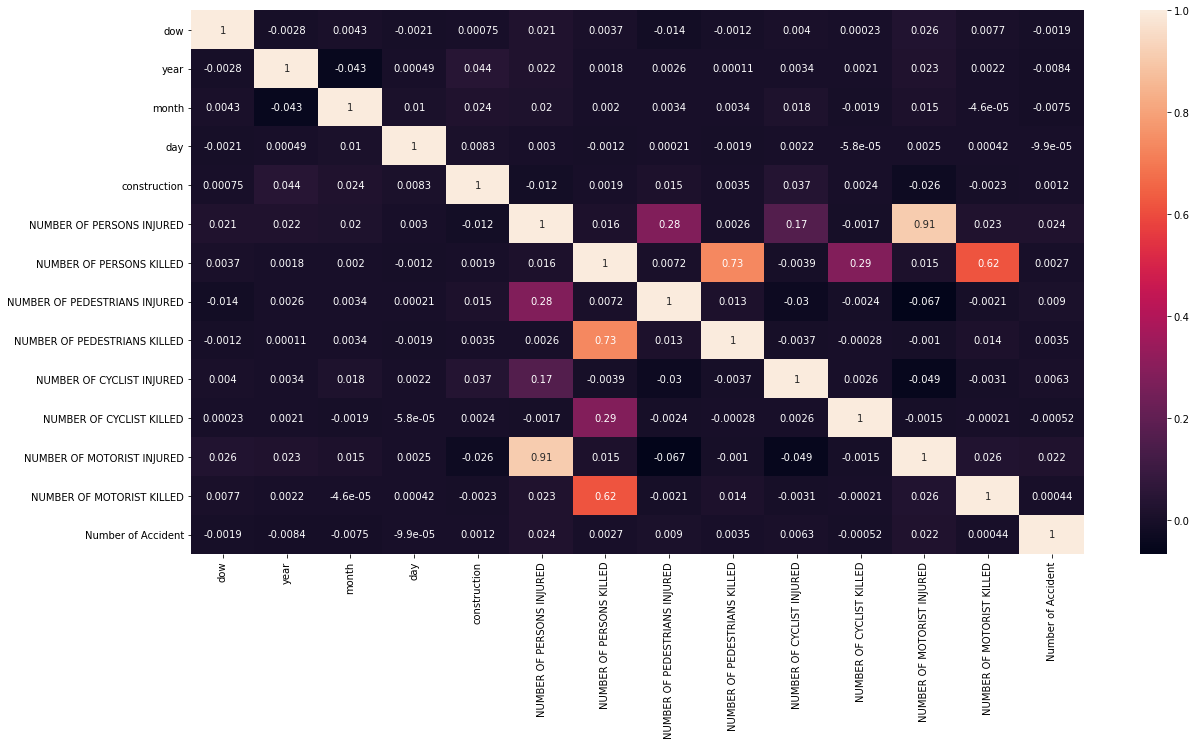

In [190]:
plt.figure(figsize=(20,10))
cor = trans_cor.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, annot = True) #Plot the correlation as heat map
plt.show()

In [191]:
# There is no linear correlation base on the heatmap above.

## Kmeans

In [192]:
x_col = ['dow','year','month','day','construction',
         'NUMBER OF PERSONS INJURED','Number of Accident']
# x_col = ['NUMBER OF PERSONS INJURED','Number of Accident']

In [208]:
X = trans_cor[x_col]

,construction,Number of Accident
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
571569,0.0,0.0
571570,0.0,0.0
571571,0.0,0.0
571572,0.0,0.0


In [194]:
cluster_range = range(2,5)
for n_c in cluster_range:
    silhouette = []
    km = KMeans(random_state=2000, n_clusters=n_c, n_jobs=-1)
    cluster_labels = km.fit(X).labels_
    silhouette.append(silhouette_score(X, cluster_labels))
    silhouette_avg = np.mean(silhouette)
    print("For n_clusters = {},".format(n_c)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.8079553926486139
For n_clusters = 3, the average silhouette_score is :0.7477519582964877
For n_clusters = 4, the average silhouette_score is :0.6664516842612745


In [195]:
km = KMeans(random_state=2000, n_clusters=2, n_jobs=-1)
cluster_labels = km.fit(X).labels_

In [196]:
km.cluster_centers_

array([[0.02118791, 0.0005325 ],
       [0.18628849, 0.00053333]])

In [197]:
df['labels'] = cluster_labels

In [198]:
label_0 = df[df['labels']==0]

In [199]:
label_1 = df[df['labels']==1]

In [200]:
kmean_1_0 = label_0[['CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','construction','Number of Accident']] \
    .groupby('CRASH DATE').sum().reset_index()
kmean_1_0

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,construction,Number of Accident
0,2016-01-01,79.0,0.0,0,296
1,2016-01-02,96.0,0.0,89,320
2,2016-01-03,90.0,0.0,190,308
3,2016-01-04,83.0,1.0,1560,441
4,2016-01-05,80.0,0.0,2761,469
...,...,...,...,...,...
1456,2019-12-27,90.0,0.0,2056,268
1457,2019-12-28,86.0,1.0,1374,228
1458,2019-12-29,125.0,0.0,818,260
1459,2019-12-30,130.0,0.0,813,365


In [201]:
kmean_1_1 = label_1[['CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','construction','Number of Accident']] \
    .groupby('CRASH DATE').sum().reset_index()
kmean_1_1

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,construction,Number of Accident
0,2016-01-04,0.0,0.0,702,2
1,2016-01-05,0.0,0.0,704,2
2,2016-01-07,0.0,0.0,1122,3
3,2016-01-08,0.0,0.0,768,2
4,2016-01-09,0.0,0.0,1152,3
...,...,...,...,...,...
1444,2019-12-25,0.0,0.0,400,1
1445,2019-12-26,0.0,0.0,1143,3
1446,2019-12-27,0.0,0.0,4972,4
1447,2019-12-28,0.0,0.0,1243,1


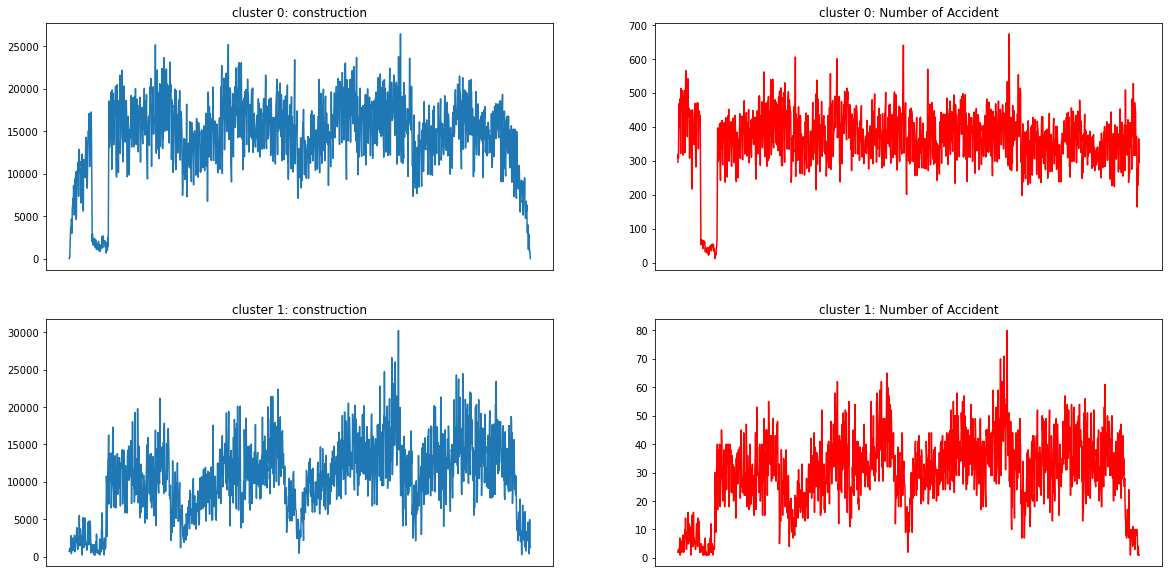

In [202]:
import matplotlib.dates as mdates
fig,axs = plt.subplots(2,2,figsize=(20, 10))
# plt.locator_params(axis='x',nbins=10)
axs[0,0].plot(kmean_1_0['CRASH DATE'],kmean_1_0['construction'])
axs[0,0].axes.xaxis.set_visible(False)
axs[0,0].set_title('cluster 0: construction')

axs[0,1].plot(kmean_1_0['CRASH DATE'],kmean_1_0['Number of Accident'],c='red')
axs[0,1].axes.xaxis.set_visible(False)
axs[0,1].set_title('cluster 0: Number of Accident')

axs[1,0].plot(kmean_1_1['CRASH DATE'],kmean_1_1['construction'])
axs[1,0].axes.xaxis.set_visible(False)
axs[1,0].set_title('cluster 1: construction')

axs[1,1].plot(kmean_1_1['CRASH DATE'],kmean_1_1['Number of Accident'],c='red')
axs[1,1].axes.xaxis.set_visible(False)
axs[1,1].set_title('cluster 1: Number of Accident')
plt.show()

In [203]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [204]:
kmean_1_0['CRASH DATE'] = pd.to_datetime(kmean_1_0['CRASH DATE'])
kmean_1_1['CRASH DATE'] = pd.to_datetime(kmean_1_1['CRASH DATE'])

In [209]:
kmean_1_0[kmean_1_0['holiday']==True]

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,construction,Number of Accident,holiday
0,2016-01-01,79.0,0.0,0,296,True
17,2016-01-18,94.0,1.0,5302,348,True
45,2016-02-15,51.0,0.0,5595,219,True
150,2016-05-30,65.0,0.0,9611,237,True
185,2016-07-04,107.0,0.0,9980,239,True
248,2016-09-05,95.0,1.0,9381,246,True
283,2016-10-10,109.0,2.0,12890,335,True
315,2016-11-11,117.0,0.0,18800,414,True
328,2016-11-24,104.0,0.0,10285,286,True
360,2016-12-26,86.0,0.0,8512,260,True


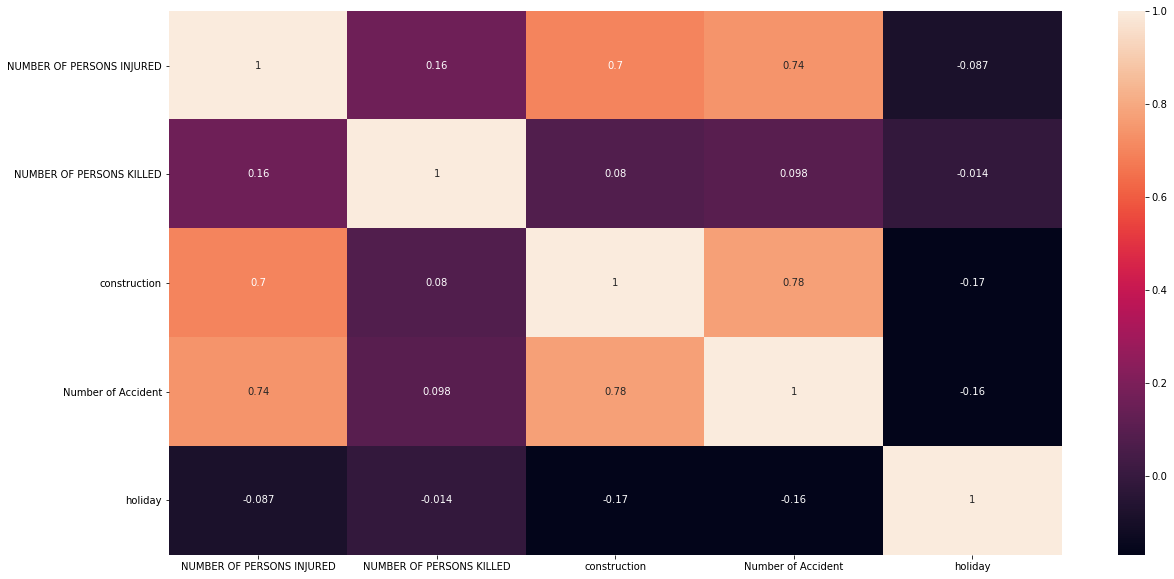

In [211]:
plt.figure(figsize=(20,10))
cor = kmean_1_0.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, annot = True) #Plot the correlation as heat map
plt.show()

In [210]:
kmean_1_1[kmean_1_1['holiday']==True]

,CRASH DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,construction,Number of Accident,holiday
13,2016-01-18,0.0,0.0,1260,3,True
41,2016-02-15,0.0,0.0,229,1,True
141,2016-05-30,8.0,0.0,6622,20,True
176,2016-07-04,17.0,0.0,6937,22,True
239,2016-09-05,7.0,0.0,4644,15,True
274,2016-10-10,5.0,0.0,8873,23,True
306,2016-11-11,6.0,0.0,15148,43,True
319,2016-11-24,0.0,0.0,2163,5,True
351,2016-12-26,5.0,0.0,4066,12,True
358,2017-01-02,3.0,0.0,3169,10,True


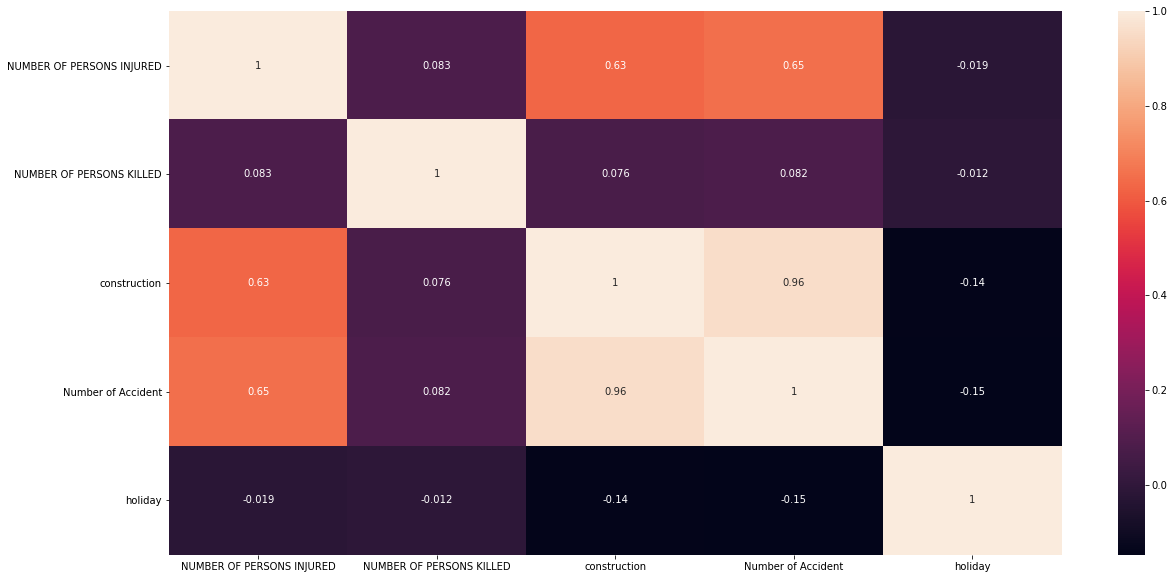

In [212]:
plt.figure(figsize=(20,10))
cor = kmean_1_1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, annot = True) #Plot the correlation as heat map
plt.show()

In [259]:
stat_con_acc(kmean_1_0)

Average number of Constructions: 14446.15742642026
Average number of Accidents: 362.6666666666667
Median number of Constructions: 15040.0
Median number of Accidents: 371.0


In [260]:
stat_con_acc(kmean_1_1)

Average number of Constructions: 10451.006211180124
Average number of Accidents: 29.841269841269842
Median number of Constructions: 10549.0
Median number of Accidents: 31.0


In [262]:
ttest_ind(kmean_1_0.construction,kmean_1_1.construction)

Ttest_indResult(statistic=22.846637409022048, pvalue=2.150044590524956e-106)

In [265]:
ttest_ind(kmean_1_0['Number of Accident'], kmean_1_1['Number of Accident'])

Ttest_indResult(statistic=140.9140828465245, pvalue=0.0)

In [ ]:
# Holiday analysis tells us that both clusters have same number of holidays

### Kmeans with data that aggregated by date

In [215]:
# Construction will be more related if we aggregate the data by date
df_date = df[['CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','construction','Number of Accident']] \
    .groupby('CRASH DATE').sum().reset_index()

In [216]:
X = df_date[['construction','Number of Accident']]

In [220]:
cluster_range = range(2,20)
for n_c in cluster_range:
    silhouette = []
    for i in range(100):
        km = KMeans(random_state=i*i, n_clusters=n_c, n_jobs=-1)
        cluster_labels = km.fit(X).labels_
        silhouette.append(silhouette_score(X, cluster_labels))
    silhouette_avg = np.mean(silhouette)
    print("For n_clusters = {},".format(n_c)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.558395098903009
For n_clusters = 3, the average silhouette_score is :0.542678008841799
For n_clusters = 4, the average silhouette_score is :0.5395007950853916
For n_clusters = 5, the average silhouette_score is :0.5324199344294919
For n_clusters = 6, the average silhouette_score is :0.5306016487523163
For n_clusters = 7, the average silhouette_score is :0.5384541516512714
For n_clusters = 8, the average silhouette_score is :0.5411740402943509
For n_clusters = 9, the average silhouette_score is :0.5398403264035395
For n_clusters = 10, the average silhouette_score is :0.535131290892522
For n_clusters = 11, the average silhouette_score is :0.5372554824481633
For n_clusters = 12, the average silhouette_score is :0.5372378677616979
For n_clusters = 13, the average silhouette_score is :0.5396634239381146
For n_clusters = 14, the average silhouette_score is :0.5384801365364451
For n_clusters = 15, the average silhouette_score is :0.538512

In [221]:
km = KMeans(random_state=2000, n_clusters=2, n_jobs=-1)
cluster_labels = km.fit(X).labels_

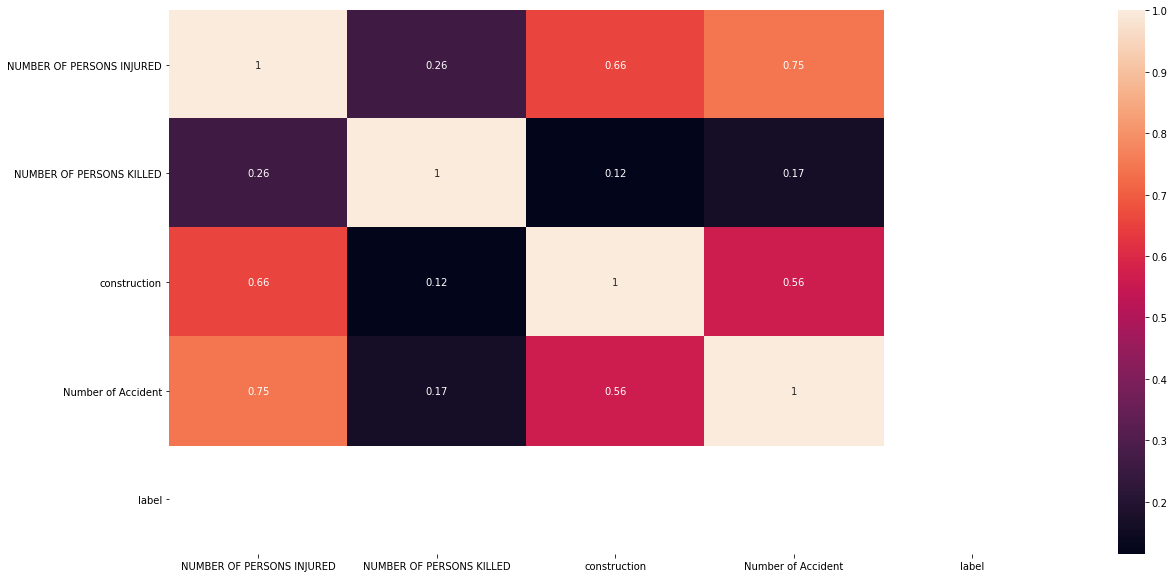

In [235]:
df_date['label'] = cluster_labels
date_0 = df_date[df_date['label'] == 0]
cor_heatmap(date_0)

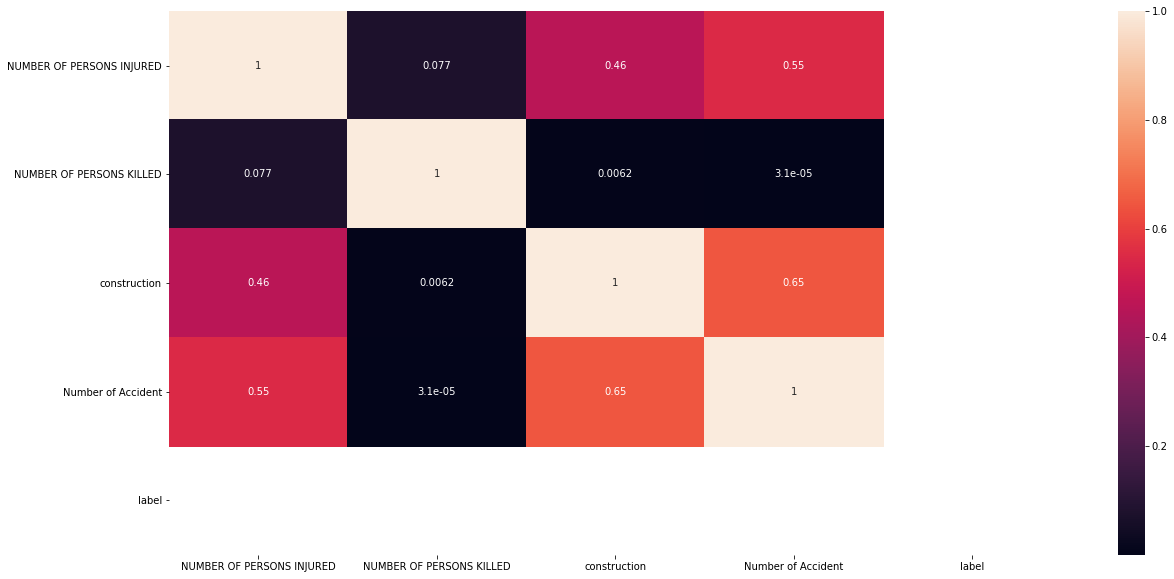

In [236]:
df_date['label'] = cluster_labels
date_1 = df_date[df_date['label'] == 1]
cor_heatmap(date_1)

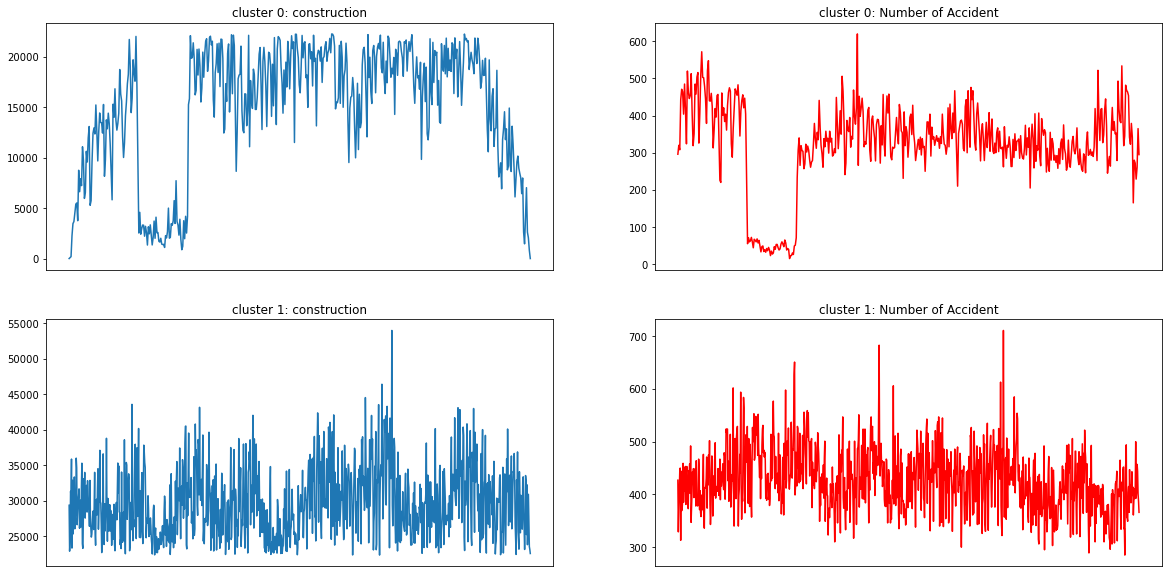

In [229]:
import matplotlib.dates as mdates
fig,axs = plt.subplots(2,2,figsize=(20, 10))
# plt.locator_params(axis='x',nbins=10)
axs[0,0].plot(date_0['CRASH DATE'],date_0['construction'])
axs[0,0].axes.xaxis.set_visible(False)
axs[0,0].set_title('cluster 0: construction')

axs[0,1].plot(date_0['CRASH DATE'],date_0['Number of Accident'],c='red')
axs[0,1].axes.xaxis.set_visible(False)
axs[0,1].set_title('cluster 0: Number of Accident')

axs[1,0].plot(date_1['CRASH DATE'],date_1['construction'])
axs[1,0].axes.xaxis.set_visible(False)
axs[1,0].set_title('cluster 1: construction')

axs[1,1].plot(date_1['CRASH DATE'],date_1['Number of Accident'],c='red')
axs[1,1].axes.xaxis.set_visible(False)
axs[1,1].set_title('cluster 1: Number of Accident')
plt.show()

In [251]:
def stat_con_acc (df):
    avg_con = df.construction.mean()
    avg_acc = df['Number of Accident'].mean()
    median_con = df.construction.median()
    median_acc = df['Number of Accident'].median()
    print('Average number of Constructions: {}'.format(avg_con))
    print('Average number of Accidents: {}'.format(avg_acc))
    print('Median number of Constructions: {}'.format(median_con))
    print('Median number of Accidents: {}'.format(median_acc))

In [252]:
stat_con_acc(date_0)

Average number of Constructions: 14938.435950413223
Average number of Accidents: 320.5392561983471
Median number of Constructions: 16867.0
Median number of Accidents: 332.5


In [253]:
stat_con_acc(date_1)

Average number of Constructions: 29702.293756397135
Average number of Accidents: 427.7942681678608
Median number of Constructions: 28997.0
Median number of Accidents: 425.0


In [256]:
ttest_ind(date_0['construction'], date_1['construction'])

Ttest_indResult(statistic=-48.90204149240067, pvalue=9.4212195749163e-310)

In [257]:
ttest_ind(date_0['Number of Accident'], date_1['Number of Accident'])

Ttest_indResult(statistic=-23.548419539171135, pvalue=3.469599688448657e-104)

## Limitation of this Dataset

The performance of the Kmeans model shows the limitation of our dataset. The dataset was acquired using the NYC construction petmit and Motor Vehicle collisions dataset. Our initial assumptions are the dateset is missing informations about the length of the street or the amount of activity of a street, and we got the number of constructions using the IssuedWorkStartDate and IssuedWorkEndDate. These two features do not tell if there were constructions actually happening on the street. Thus, the dateset will not give me perfect analysis on the relationship between constructions and accidents, and the result matches our assumptions.

## Holiday Analysis

In [309]:
dr = pd.date_range(start='2016-01-01', end='2019-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df_holiday = df.copy()

In [310]:
df_holiday['CRASH DATE'] = pd.to_datetime(df_holiday['CRASH DATE'])
df_holiday['holiday'] = df_holiday['CRASH DATE'].isin(holidays)

In [311]:
df_holiday['holiday'] = df_holiday['holiday'].replace(True,1)
df_holiday['holiday'] = df_holiday['holiday'].replace(False,0)
# holiday_0 = df_holiday[df_holiday['holiday']==0]
# holiday_1 = df_holiday[df_holiday['holiday']==1]

In [306]:
# fig,axs = plt.subplots(2,2,figsize=(20, 10))
# # plt.locator_params(axis='x',nbins=10)
# axs[0,0].plot(holiday_0['CRASH DATE'],holiday_0['construction'])
# axs[0,0].axes.xaxis.set_visible(False)
# axs[0,0].set_title('cluster 0: construction')

# axs[0,1].plot(holiday_0['CRASH DATE'],holiday_0['Number of Accident'],c='red')
# axs[0,1].axes.xaxis.set_visible(False)
# axs[0,1].set_title('cluster 0: Number of Accident')

# axs[1,0].plot(holiday_1['CRASH DATE'],holiday_1['construction'])
# axs[1,0].axes.xaxis.set_visible(False)
# axs[1,0].set_title('cluster 1: construction')

# axs[1,1].plot(holiday_1['CRASH DATE'],holiday_1['Number of Accident'],c='red')
# axs[1,1].axes.xaxis.set_visible(False)
# axs[1,1].set_title('cluster 1: Number of Accident')
# plt.show()

In [ ]:
X = df_holiday[['construction','Number of Accident','holiday']]
cluster_range = range(2,20)
for n_c in cluster_range:
    silhouette = []
    for i in range(100):
        km = KMeans(random_state=i*i, n_clusters=n_c, n_jobs=-1)
        cluster_labels = km.fit(X).labels_
        silhouette.append(silhouette_score(X, cluster_labels))
    silhouette_avg = np.mean(silhouette)
    print("For n_clusters = {},".format(n_c)+" the average silhouette_score is :{}".format(silhouette_avg))

### Old dataset

In [148]:
df_crash_permit = pd.read_csv('crash_permit.csv')
df_crash_permit

,key,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,total_constructions,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,"('BRONX', '3 AVENUE')",668.0,1.0,188,1,49,0,431,0,202255,...,74,9,10,8,7,7,4,3,0,0
1,"('BRONX', '5 AVENUE')",0.0,0.0,0,0,0,0,0,0,40,...,0,0,0,0,0,0,0,0,0,0
2,"('BRONX', 'ABBOT STREET')",0.0,0.0,0,0,0,0,0,0,36,...,0,0,0,0,0,0,0,0,0,0
3,"('BRONX', 'ADAMS PLACE')",2.0,0.0,1,0,1,0,0,0,1377,...,0,0,0,0,0,0,0,0,0,0
4,"('BRONX', 'ADAMS STREET')",3.0,0.0,2,0,0,0,1,0,1758,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,"('STATEN ISLAND', 'YUCCA DRIVE')",0.0,0.0,0,0,0,0,0,0,607,...,0,0,0,0,0,0,0,0,0,0
6263,"('STATEN ISLAND', 'YUKON AVENUE')",6.0,0.0,1,0,0,0,5,0,2414,...,0,0,0,0,0,0,0,0,0,0
6264,"('STATEN ISLAND', 'ZEBRA PLACE')",0.0,0.0,0,0,0,0,0,0,320,...,0,0,0,0,0,0,0,0,0,0
6265,"('STATEN ISLAND', 'ZOE STREET')",0.0,0.0,0,0,0,0,0,0,4006,...,0,0,0,0,0,0,0,0,0,0
